# Recurrent Neural Network

**1. Data Preprocessing**

**Importing the libraries**

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the training set**

In [26]:
# We don't need test set because I want to highlight the fact that RNN don't know anything about test set
# There is no acquaintance of the test set during its training 
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [27]:
# training_set: numpy array of open column
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feature Scaling**<br>Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
sc = MinMaxScaler(feature_range = (0, 1))
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**Creating a data structure with 60 timesteps and 1 output**<br>
60 timesteps means that at each time t, the RNN is going to look at 60 stock prices before time t

In [31]:
X_train = []
y_train = []

In [32]:
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [33]:
X_train, y_train = np.array(X_train), np.array(y_train)
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838


In [34]:
pd.DataFrame(y_train).head(5)

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383


In [35]:
X_train.shape

(1198, 60)

**Reshaping**<br>We have **one** indicator which is 'open google stock price'

In [36]:
# Anytime you want to add a dimension in numpy array, you will always use "reshape"
# reshape's input: batch_size=1198, timesteps=60, indicator (number of predictors)=1 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

**2. RNN**

**Importing the Keras libraries**

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Initialising the RNN**

In [38]:
regressor = Sequential()

In [39]:
X_train.shape[1]

60

**First LSTM layer + Some Dropout regularisation**

In [40]:
# 50 high dimensionality
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [41]:
# relevent choice = 0.2: drop 20%
regressor.add(Dropout(rate = 0.2))

**Second LSTM layer + Some Dropout regularisation**

In [42]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

**Third LSTM layer + Some Dropout regularisation**

In [43]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

**Fourth LSTM layer + Some Dropout regularisation**

In [44]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.2))

**Output layer**

In [45]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [46]:
# optimizer = 'RMSprop': is usually a good choice for recurrent neural networks
# It's not classification, os we don't use 'binary cross entropy'
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting**

In [47]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0434
Epoch 2/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

**Predictions**

**Getting the real stock price of 2017**

In [50]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

**Predict stock price of 2017**

In [56]:
# concat original values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
len(dataset_total) == len(dataset_train) + len(dataset_test)

True

In [67]:
# 'inputs' contain all the inputs that we need to predict all the stock prices of January 2017
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [68]:
inputs = inputs.reshape(-1,1)

In [69]:
# same scale
inputs = sc.transform(inputs)

In [70]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [71]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [72]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

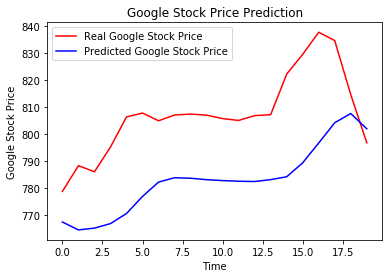

In [73]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**RMSE (Root Mean Squared Error)**

In [77]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

26.7710806509329

**improve the RNN**<br>
1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.<br><br>
2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).<br><br>
3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.<br><br>
4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.<br><br>
5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.